In [58]:
import scipy.io as scio
import os
import mne
import numpy as np
import time
from IPython import display
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import pandas as pd
import seaborn as sns
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test
import scipy.stats as stats
from statannotations.Annotator import Annotator
%matplotlib inline
# sns.set(style="whitegrid")

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
#### all subject file names in directory for reference
sub_ids_lst = []
# TODO: enter subject IDs in list above

In [61]:
def delete_multiple_elements(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)## define functions for extracting relevant epochs
            
def stats_plot(df, save_dir, feature):
    '''
    df = dataframe (mean, peak)
    save_dir = directory to save stats PNG and TXT files
    feature = 'mean','peak'
    '''    

    pairs=[((f,conditions[0]),(f,conditions[1])) for f in freq_bands_of_interest]

    for roi in roi_names:        
        df_ch_tmp=df.query(f"channel=='{roi}'")
       

        #stats plot
        plt.figure(figsize=(8.6,6.5));
        ax_tmp = sns.boxplot(data=df_ch_tmp,x='band', y='value', hue='condition',
                palette='pastel', order=freq_bands_of_interest,
                hue_order=conditions,
                linewidth=0.5)

        ax_tmp.set_title(f"{roi} | Resting state Power | Feature: '{feature}' ",pad=30)

        #stats output
        x='band'
        y='value'
        hue='condition'
        order=freq_bands_of_interest
        hue_order = conditions

        test = 'Mann-Whitney'
        print(f"******************************************************{roi} {test}******************************************************")
        annot = Annotator(ax_tmp, pairs, data=df_ch_tmp, x=x, y=y, hue=hue, order=order,hue_order=hue_order)
        annot.configure(test=test, text_format='star', loc='outside',comparisons_correction=None)
        annot.apply_test()
        annot.annotate()

        # save plot and tfr data
        # TODO: follow same naming convention as in preprocessing code
        save_fname = f"{roi}_{feature}_{day}"
        
        # plot as png
        plt.savefig(os.path.join(save_dir,sub_folder,save_fname+".png"))
        plt.figure()
        
        # tfr data as csv
        df_ch_tmp.to_csv(os.path.join(save_dir,sub_folder,save_fname+".csv"))
        display.clear_output(wait=True)  

In [3]:
# SETTINGS:

# 1. Choose Asleep or Awake data
sub_state = 'Awake'

# 2. Set number of CPU cores to use for computing PSD. Default to -1 unless another user is running an intense program
n_cores = -1 # 1

In [2]:
# data directories
processed_info_dir = "../../../George Kenefati/Dan Friedman sEEG Data/"
parent_data_dir = f"../../../George Kenefati/Dan Friedman sEEG Data/"
save_dir = f"../../../George Kenefati/Dan Friedman sEEG Data/PO1 vs last day stats results/"

# Globals
Fs = 2000 # Hz

bmin,bmax = 0,0 # baseline start and end for z-score

# TODO: change to appropriate labels for sEEG data. those below are from source space data
roi_names = [# Right
'rostralanteriorcingulate-rh', # Right Rostral ACC
'caudalanteriorcingulate-rh', # Right Caudal ACC
'postcentral-rh', # , Right S1
'insula-rh', 'superiorfrontal-rh', # Right Insula, Right DL-PFC
'medialorbitofrontal-rh', # Right Medial-PFC
# Left
 'rostralanteriorcingulate-lh', # Left Rostral ACC
 'caudalanteriorcingulate-lh', # Left Caudal ACC
 'postcentral-lh', # Left S1,
 'insula-lh', 'superiorfrontal-lh', # Left Insula, Left DL-PFC,
 'medialorbitofrontal-lh' # Left Medial-PFC
]

n_channels = len(roi_names)

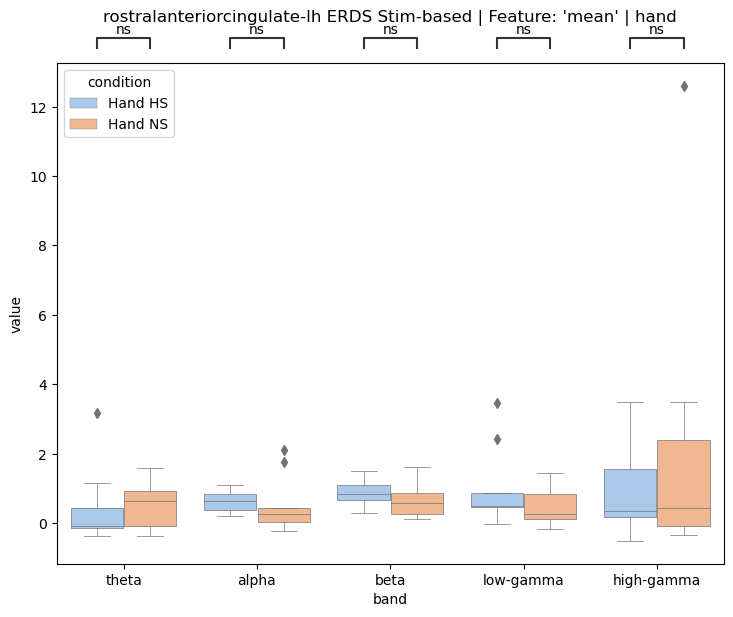

<Figure size 640x480 with 0 Axes>

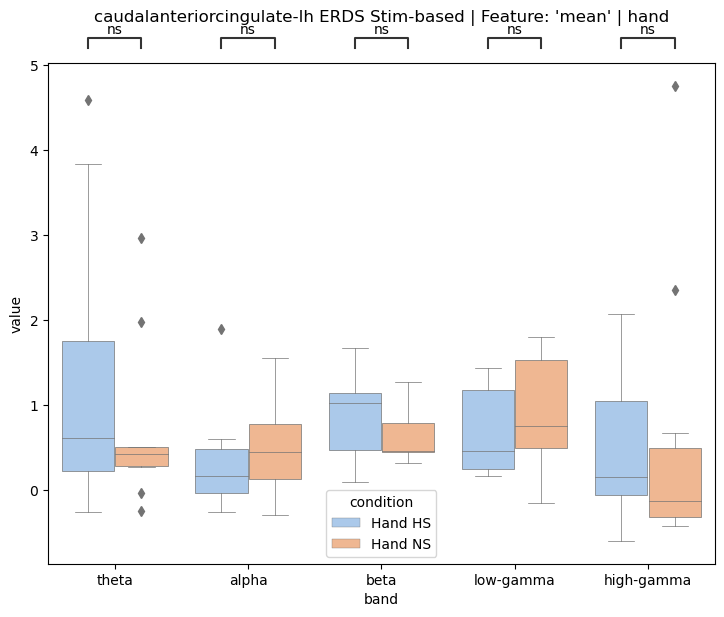

<Figure size 640x480 with 0 Axes>

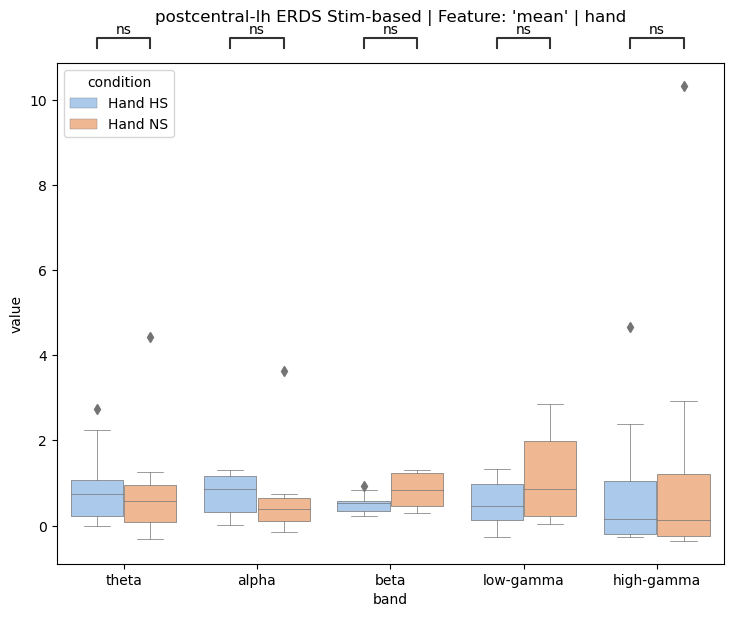

<Figure size 640x480 with 0 Axes>

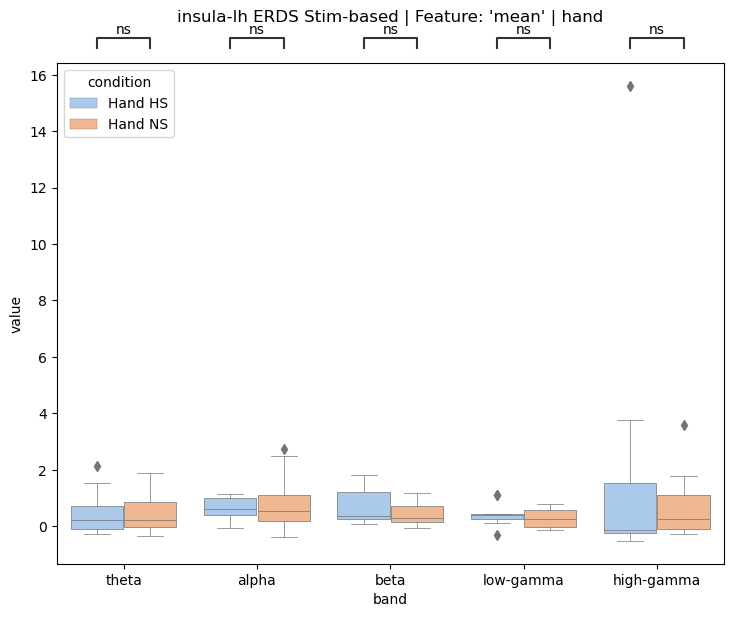

<Figure size 640x480 with 0 Axes>

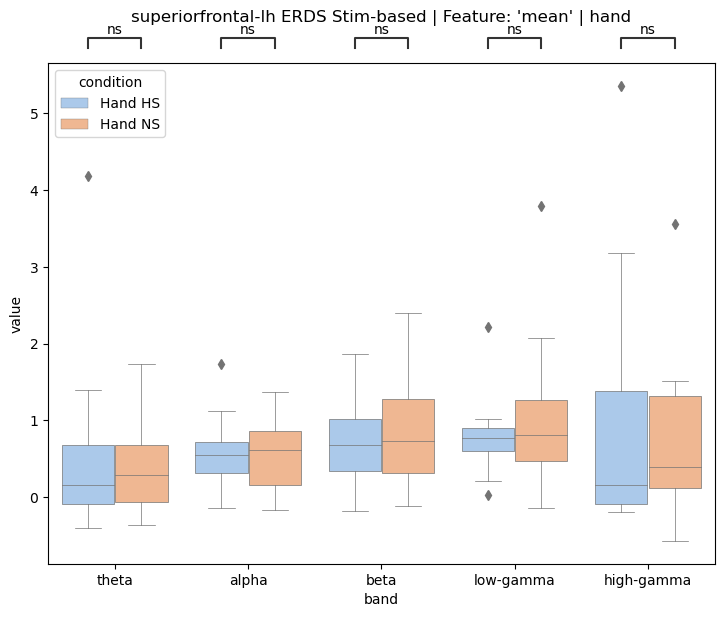

<Figure size 640x480 with 0 Axes>

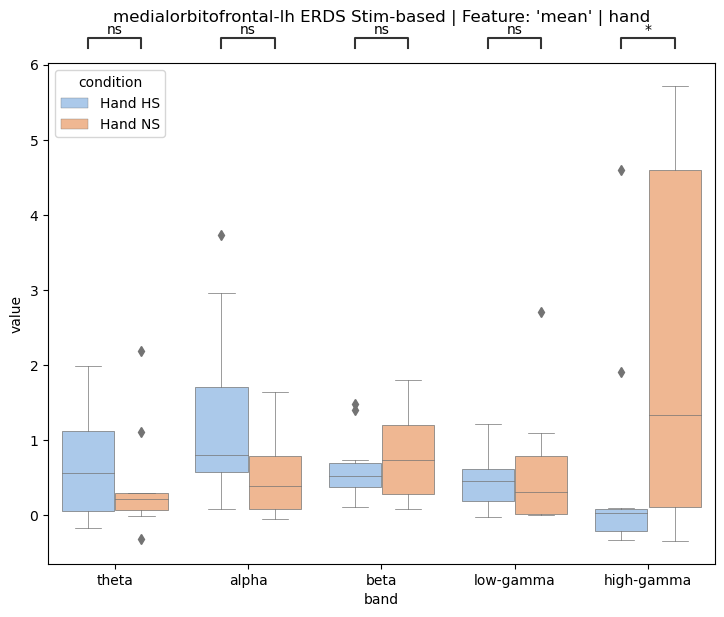

<Figure size 640x480 with 0 Axes>

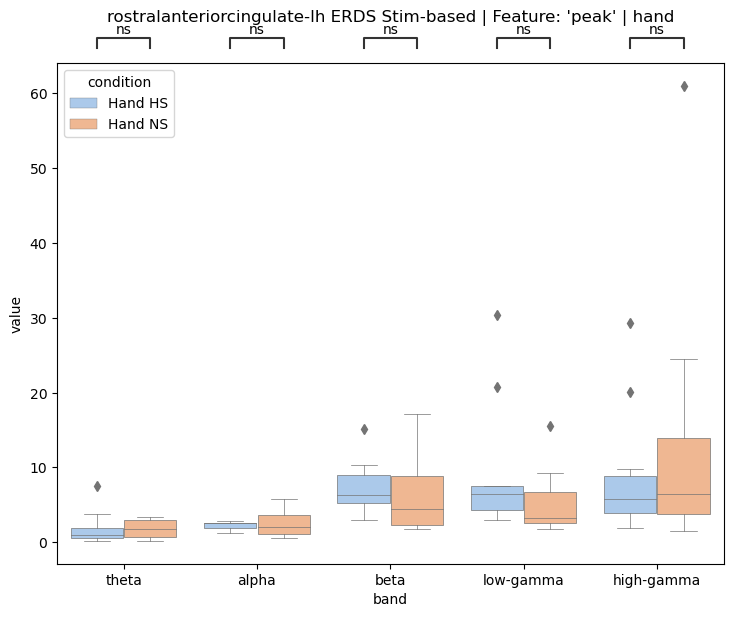

<Figure size 640x480 with 0 Axes>

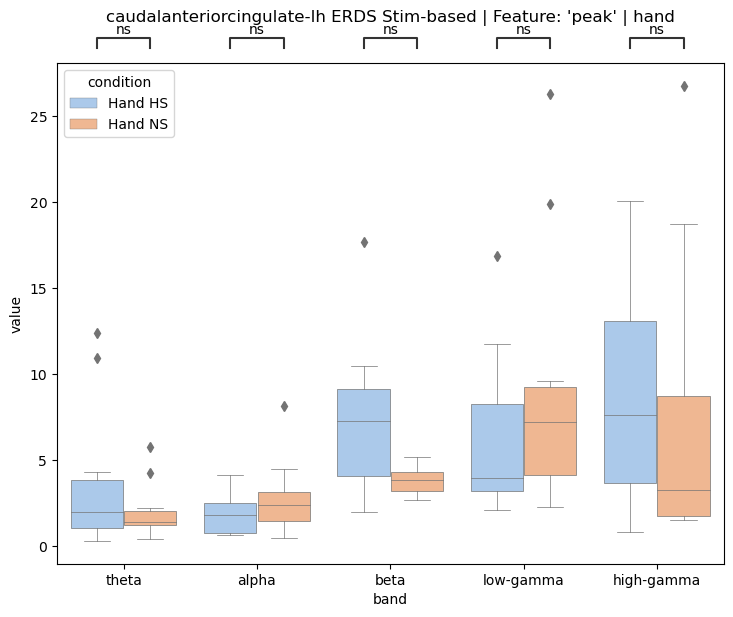

<Figure size 640x480 with 0 Axes>

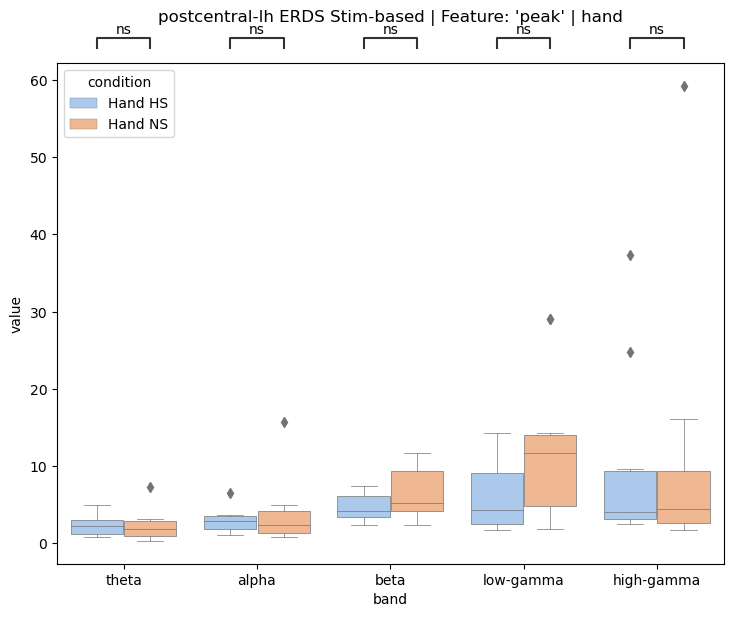

<Figure size 640x480 with 0 Axes>

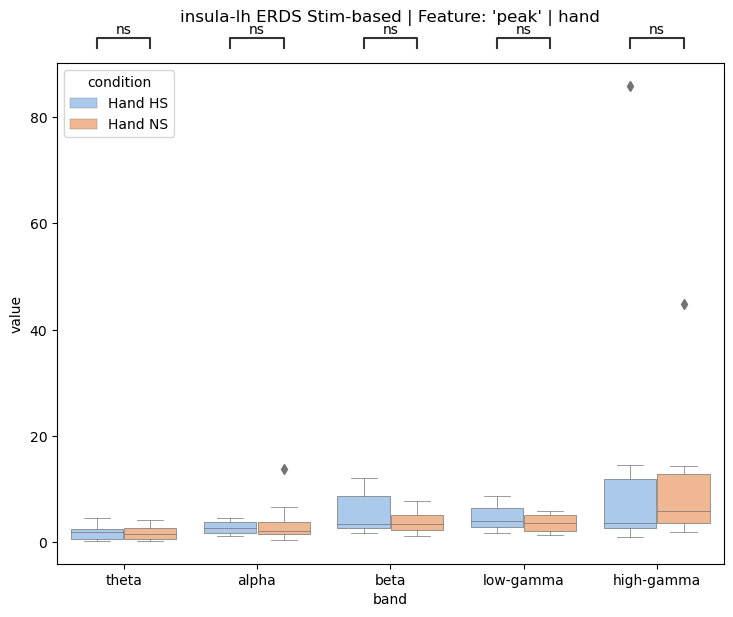

<Figure size 640x480 with 0 Axes>

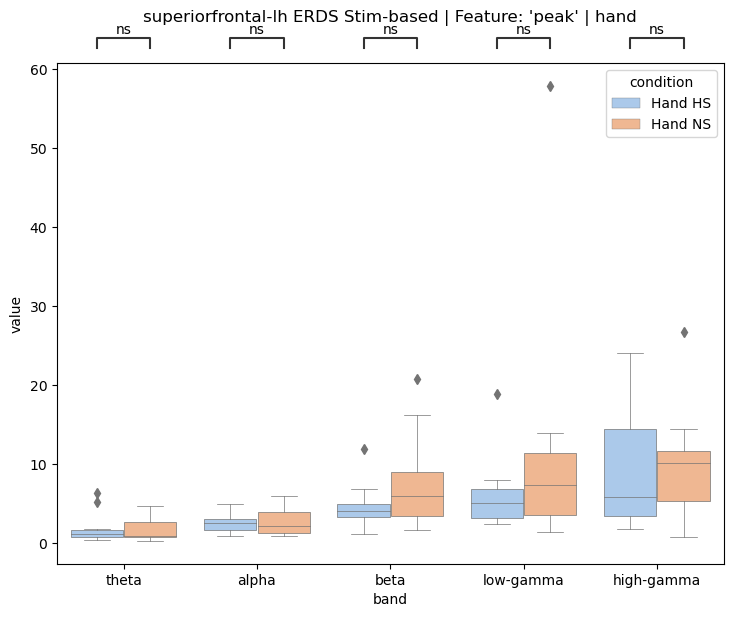

<Figure size 640x480 with 0 Axes>

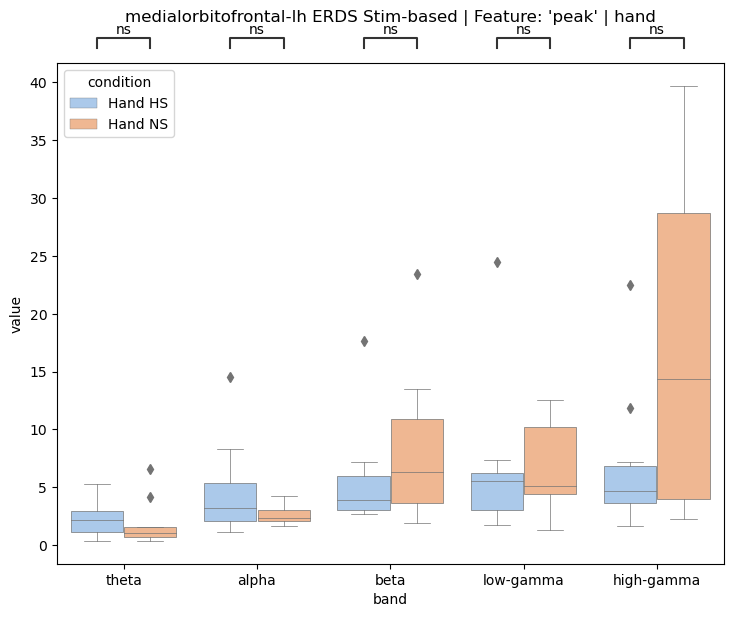

<Figure size 640x480 with 0 Axes>

In [64]:
df_mean_all=[]
df_peak_all=[]

#loop through to analyze each subject 
for sub_folder in os.listdir(parent_data_dir):
    sub_num='' # reset
    # ignores hidden files
    if sub_folder.startswith('.') or sub_folder not in chosen_list:
        continue
    elif sub_folder in chosen_list:
        if not os.path.exists(os.path.join(save_dir,sub_folder)):
            os.mkdir(os.path.join(save_dir,sub_folder))        
        sub_num=sub_folder

    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ LOAD SUBJECT DATA @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ #
    data_dir = os.path.join(parent_data_dir,sub_num)

    print(f"{sub_num}\nReading data...\n")

    conditions=[]
    for folder in os.listdir(data_dir):
        day_file_1 ='' # reset
        day_file_2 ='' # reset
        if folder.startswith('Day'):
            # TODO: append the name of each Day X folder to the 'conditions' list 

            edf_fnames=[]
            # TODO: use for loop with os.listdir to list the names of the EDF files and save the path for the two files of interest. either Awake1 and 2 or Asleep 1 and 2. 
            # Use the sub_state variable for this
                print(sub_fname)
                raw_tmp=mne.io.read_raw(os.path.join(data_dir,file))
                raw_names_lst.append(os.path.join(data_dir,file))
                raw_objects_lst.append(raw_tmp)

    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ LOAD PROCESSED INFO @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ #
    print(f"Reading Info for Subject {sub_num}...")

    # # Load in pain rating for each stimuli - pain ratings from Intracranial subjects are WIP
    # pain_ratings = scio.loadmat(os.path.join(processed_info_dir,sub_num+'_pain_ratings.mat'))
    # pain_ratings = pain_ratings['pain_ratings'].tolist()[0]
    # print(f"*pain_ratings.size = {len(pain_ratings)}*\n")

    # # Load in drop log for bad trials
    # drop_log = scio.loadmat(os.path.join(processed_info_dir,sub_num+'_drop_log.mat'))
    # drop_log = drop_log['drop_log'] # leave as array
    # print(f"*drop_log.size = {drop_log.shape[0]}*\n")

    display.clear_output(wait=True)

    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ COMPUTE PSD FROM RAW FIF @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ #

    # TODO: implement following tutorial for psd from raw.fif
    # https://mne.tools/0.21/auto_examples/time_frequency/plot_compute_raw_data_spectrum.html
    
    # Extract PSD into each frequency band of interest
    broad1 = epochs.compute_psd(fmin=1., fmax=50., n_jobs=-1) 
    broad2 = epochs.compute_psd(fmin=70., fmax=90., n_jobs=-1) # avoid the notch filter
    delta = epochs.compute_psd(fmin=1., fmax=4., n_jobs=-1)
    theta = epochs.compute_psd(fmin=4., fmax=8., n_jobs=-1)
    alpha = epochs.compute_psd(fmin=8., fmax=13., n_jobs=-1)
    beta = epochs.compute_psd(fmin=13., fmax=30., n_jobs=-1)
    low_gamma = epochs.compute_psd(fmin=30., fmax=55., n_jobs=-1)
    high_gamma = epochs.compute_psd(fmin=65., fmax=90., n_jobs=-1)

    # Get data (shape = epochs x channels x powers in each band (1 hz width))
    psds_broad1 = broad1.get_data()
    psds_broad2 = broad2.get_data()
    psds_delta = delta.get_data()
    psds_theta = theta.get_data()
    psds_alpha = alpha.get_data()
    psds_beta = beta.get_data() 
    psds_low_gamma = low_gamma.get_data()
    psds_high_gamma = high_gamma.get_data()

    # Get average power across bands (shape = epochs x channels)
    avg_psd_broad1 = np.mean(psds_broad1, axis=2)
    avg_psd_broad2 = np.mean(psds_broad1, axis=2)
    avg_psd_delta = np.mean(psds_delta, axis=2)
    avg_psd_theta = np.mean(psds_theta, axis=2)
    avg_psd_alpha = np.mean(psds_alpha, axis=2)
    avg_psd_beta = np.mean(psds_beta, axis=2)
    avg_psd_low_gamma = np.mean(psds_low_gamma, axis=2)
    avg_psd_high_gamma = np.mean(psds_high_gamma, axis=2)

    # Combine broad spectrum powers and take the trace
    avg_psd_broad = np.mean( np.array([avg_psd_broad1, avg_psd_broad2 ]), axis=0 )
    trace_avg_psd_broad = np.trace(avg_psd_broad)
    print("Trace of the average broad spectrum power: ",trace_avg_psd_broad)

    # Get band PSD's normalized by the trace of the broad spectrum and convert to dB
    avg_psd_delta = 10 * np.log10(avg_psd_delta / trace_avg_psd_broad)
    avg_psd_theta = 10 * np.log10(avg_psd_theta / trace_avg_psd_broad)
    avg_psd_alpha = 10 * np.log10(avg_psd_alpha / trace_avg_psd_broad)
    avg_psd_beta = 10 * np.log10(avg_psd_beta / trace_avg_psd_broad)
    avg_psd_low_gamma = 10 * np.log10(avg_psd_low_gamma / trace_avg_psd_broad)
    avg_psd_high_gamma = 10 * np.log10(avg_psd_high_gamma / trace_avg_psd_broad)

    avg_psd_arr = np.array((avg_psd_delta, avg_psd_theta, 
                          avg_psd_alpha, avg_psd_beta,
                          avg_psd_low_gamma, avg_psd_high_gamma))
    
    # # TODO: you may or may not need to use the following code block but im leaving it here just in case 
    # data_chs_array = np.zeros((len(roi_names),len(epo_times),Fs))
    # data_trials_tmp=np.zeros((len(epo_times),Fs))
    # for j,raw in enumerate(raw_objects_lst): # for each roi
    #     extracted_data_tmp=raw.data
    #     for i in range(len(epo_times)): # for each trial
    #         #all vertices
    #         all_vertices_tmp=extracted_data_tmp[:,int(epo_times[i]+tmin*Fs):int(epo_times[i]+tmax*Fs)]
    #         #averaged vertices
    #         vertices_averaged_tmp=np.mean(all_vertices_tmp,axis=0)
    #         #store trials x time data in numpy array
    #         data_trials_tmp[i,:] = vertices_averaged_tmp
    #     data_chs_array[j,...] = data_trials_tmp
    # # data in Array format 
    # data_chs_corrected_array=np.transpose(data_chs_array,(1,0,2))

    # Z-score data by for loop
    # TODO: z-score the data on a segment of the last-day data, and exclude that segment from the last-day data to be analyzed
    data_epo=combined_data_trials
    print(data_epo.shape)
    data_epo_zscore=np.copy(data_epo)
    for i in range(data_epo.shape[0]): # for each epoch
        for j in range(data_epo.shape[1]): # for each channel
            # compute mean and std of baseline
            base_mean = np.mean(data_epo[i,j,:len_baseline_samples])
            base_std = np.std(data_epo[i,j,:len_baseline_samples])
        
            # compute z-scored data from baseline stats
            data_epo_zscore[i,j,:] = (data_epo[i,j,:]-base_mean)/base_std

    # compare data before and after z-score
    print(data_epo[0,0,len_baseline_samples:len_baseline_samples+10],'\n')
    print(data_epo_zscore[0,0,len_baseline_samples:len_baseline_samples+10])

    # TODO: epochs object will just have z-scored day 1 data and last day data
    # Create info object required for epochs object
    info = mne.create_info(roi_names, sfreq=Fs,ch_types='eeg')
    data_epo = data_chs_corrected_array
    # Create events array for Epochs object
    # TODO: 0*i means the start time from each piece of data will just be 0
    # because we dont have any epochs in the data, we are treating the entire thing
    # as one epoch.
    # NOTE: the i in the last term of the list should just populate 0 and then 1,
    # indicating day 1 as label of 0 and last day as label of 1.
    
    events=np.array([[0*i,0,i] for i in range(len(conditions))])

    zepochs = mne.EpochsArray(data=data_epo_zscore,
                              info=info,
                              tmin=tmin,
                              events=events,
                              event_id=event_ids_dict,
                              baseline=(None,bmax),
                              )
    print(zepochs)
    epochs=zepochs 
    del zepochs

    display.clear_output(wait=True)
    
    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ CONSTRUCT TFR OBJECT FOR DF @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ #
    
    # TODO: do not implement ERDS, leaving this code here to figure out how to use it to set up the dataframe
    tfr = tfr_multitaper(
        epochs,
        freqs=freqs,
        n_cycles=freqs,
        use_fft=True,
        return_itc=False,
        average=False,
        decim=2,
    )
    tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

    for event in event_ids:
        # select desired epochs for visualization
        tfr_ev = tfr[event]
        fig, axes = plt.subplots(
            1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
        )
        for ch, ax in enumerate(axes[:-1]):  # for each channel
            # positive clusters
            _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
            # negative clusters
            _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

            # note that we keep clusters with p <= 0.05 from the combined clusters
            # of two independent tests; in this example, we do not correct for
            # these two comparisons
            c = np.stack(c1 + c2, axis=2)  # combined clusters
            p = np.concatenate((p1, p2))  # combined p-values
            mask = c[..., p <= 0.05].any(axis=-1)

            # plot TFR (ERDS map with masking)
            tfr_ev.average().plot(
                [ch],
                cmap="RdBu",
                cnorm=cnorm,
                axes=ax,
                colorbar=False,
                show=False,
                mask=mask,
                mask_style="mask",
            )

            ax.set_title(epochs.ch_names[ch], fontsize=10)
            ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
            if ch != 0:
                ax.set_ylabel("")
                ax.set_yticklabels("")
        fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
        fig.suptitle(f"ERDS ({event})")
        plt.show()

    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ SET UP PANDAS DATAFRAMES @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ #

    #Export tfr to pandas df in seconds
    df = tfr.to_data_frame(time_format=None, long_format=False)
    df.head()

    #Plot with confidence bands 
    df = tfr.to_data_frame(time_format=None, long_format=True)

    # Map to frequency bands:
    freq_bounds = {'_': 0,
                   'delta': 4,
                   'theta': 7,
                   'alpha': 13,
                   'beta': 35,
                   'low-gamma': 55,
                   'notch': 65,
                   'high-gamma': 100,
                   'MUA': 500
                  }

    df['band'] = pd.cut(df['freq'], list(freq_bounds.values()),
                        labels=list(freq_bounds)[1:])

    # Filter to retain only relevant frequency bands:
    freq_bands_of_interest = [
                              # 'delta', 
                              'theta', 
                              'alpha', 
                              'beta', 
                              'low-gamma', 
                              'high-gamma',
                              'MUA',
        ]
    df = df[df.band.isin(freq_bands_of_interest)]
    df['band'] = df['band'].cat.remove_unused_categories()

    # Order channels for plotting:
    df['channel'] = df['channel'].cat.reorder_categories(tuple(roi_names),
                                                         ordered=True)

    g = sns.FacetGrid(df, row='band', col='channel', margin_titles=True)
    g.map(sns.lineplot, 'time', 'value', n_boot=10)
    axline_kw = dict(color='black', linestyle='dashed', linewidth=0.5, alpha=0.5)
    g.map(plt.axhline, y=0, **axline_kw)
    g.map(plt.axvline, x=0, **axline_kw)
    g.set(xlim=(tmin+0.5,tmax-0.5))
    # g.set(ylim=(None, 3))
    g.set_axis_labels("Time (s)", "Z-scored Band Power (uV^2)")
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.add_legend(ncol=2, loc='lower center')
    g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)
    plt.show();

    display.clear_output(wait=True)

    # Plot the ERDS based on average, peak amplitude, and area-under-the-curve (AUC), one by one.
    df_mean = (df.query(f"time > {tmin}")
                 .groupby(['epoch','band','channel'])[['value']]
                 .mean()
                 .dropna(subset=['value']) # needed to remove taking average over non-numeric values
                 .reset_index())

    df_mean_all.append(df_mean) #when it loops through each subject, will save the mean in the array

    df_peak = (df.query(f"time > {tmin} & time < {tmax}")
                 .groupby(['epoch','band','channel'])[['value']]
                 .max() # peak amplitude
                 .dropna(subset=['value']) # needed to remove taking average over non-numeric values
                 .reset_index())
    df_peak_all.append(df_peak) #when it loops through each subject, will save the peak

    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ EVALUATE AND SAVE STATS OUTPUTS @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ #
    stats_plot(df_mean, save_dir, 'mean')
    stats_plot(df_peak, save_dir, 'peak')
    
    display.clear_output(wait=True)